In [1]:
#Building a model for Titanic dataset using Logistic Regression and Decision Tree

#Required models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Dataset=pd.read_csv('D:\\Titanic.csv')

In [3]:
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#No of passanger in the original Data
print(len(Dataset.index))

891


Analyse Data

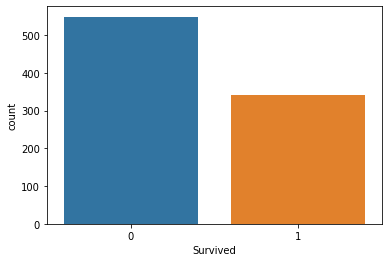

In [5]:
#comparing survived and non  survived
sns.countplot(x='Survived',data=Dataset)

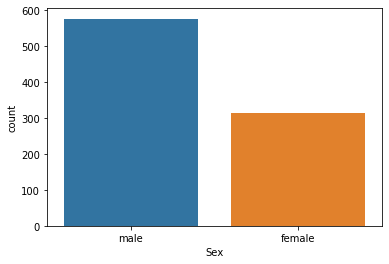

In [6]:
#Comparision over sex
sns.countplot(x='Sex',data=Dataset)

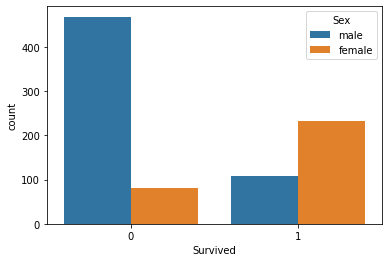

In [7]:
#Comparision of Survival over Sex
sns.countplot(x='Survived',hue='Sex',data=Dataset)

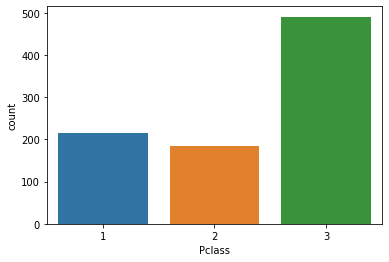

In [8]:
#No comparision of Different class passanger
sns.countplot(x='Pclass',data=Dataset)

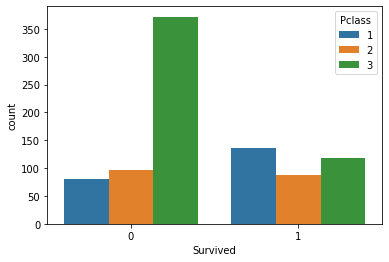

In [9]:
#Servival Comparison on different classes
sns.countplot(x='Survived',hue='Pclass',data=Dataset)

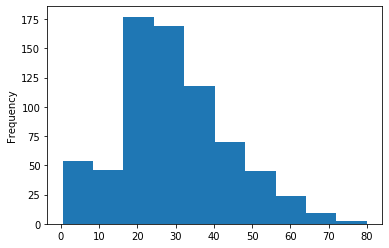

In [10]:
Dataset['Age'].plot.hist()

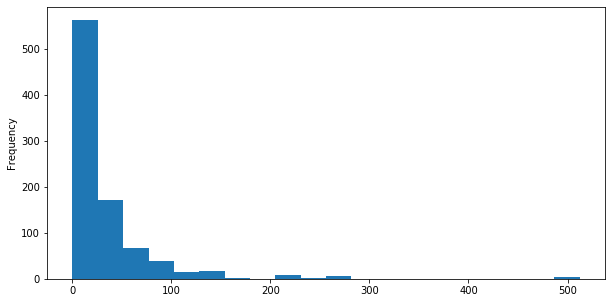

In [11]:
Dataset['Fare'].plot.hist(bins=20,figsize=(10,5))

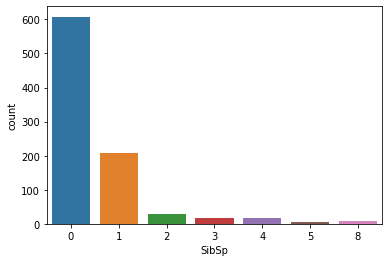

In [12]:
#siblings
sns.countplot(x='SibSp',data=Dataset)

# Data Preprosessing

# DATA Cleaning

In [13]:
#Checking Null Data
Dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
Dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

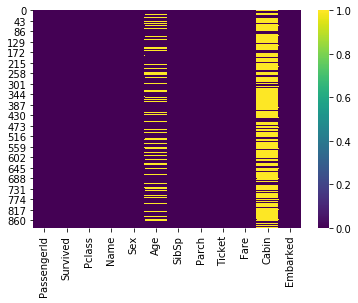

In [15]:
sns.heatmap(Dataset.isnull(),cmap='viridis')

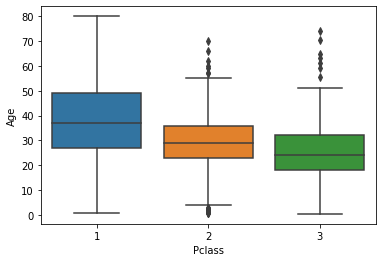

In [16]:
#Box Plot for comparing the age over passanger class
sns.boxplot(x='Pclass',y='Age',data=Dataset)

In [17]:
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
Dataset.drop('Cabin',axis=1,inplace=True)

In [19]:
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
Dataset.dropna(inplace=True)

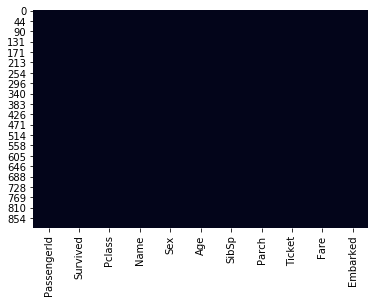

In [21]:
sns.heatmap(Dataset.isnull(),cbar=False)

In [22]:
Dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
#Changing Categorical variable to Dummy variable
sex=pd.get_dummies(Dataset['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
embark=pd.get_dummies(Dataset['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
pclass=pd.get_dummies(Dataset['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [26]:
Dataset=pd.concat([Dataset,sex,embark,pclass],axis=1)
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [27]:
#Final Dataset
Dataset.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
Dataset.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [28]:
#Train
X=Dataset.drop('Survived',axis=1)#Independet 
y=Dataset['Survived']#Dependent

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lgmodel=LogisticRegression()
lgmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
prediction=lgmodel.predict(X_test)

In [34]:
#classification report
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       147\n           1       0.78      0.72      0.75       103\n\n    accuracy                           0.80       250\n   macro avg       0.80      0.79      0.79       250\nweighted avg       0.80      0.80      0.80       250\n'

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)


array([[126,  21],
       [ 29,  74]], dtype=int64)

In [36]:
#Accurrecy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)*100

80.0

In [37]:
#Descision Tree
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [38]:
treeModel=DecisionTreeClassifier()
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
prediction=treeModel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.82      0.82      0.82        85\n           1       0.74      0.74      0.74        58\n\n    accuracy                           0.79       143\n   macro avg       0.78      0.78      0.78       143\nweighted avg       0.79      0.79      0.79       143\n'

In [41]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)


array([[70, 15],
       [15, 43]], dtype=int64)

In [42]:
#Accurrecy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)*100

79.02097902097903